**IMPORTING NECESSARY LIBRARIES**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**LOADING THE TITANIC DATASET**

In [152]:
titanic=sns.load_dataset('titanic')

In [153]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**CHECKING FOR NULL VALUES**

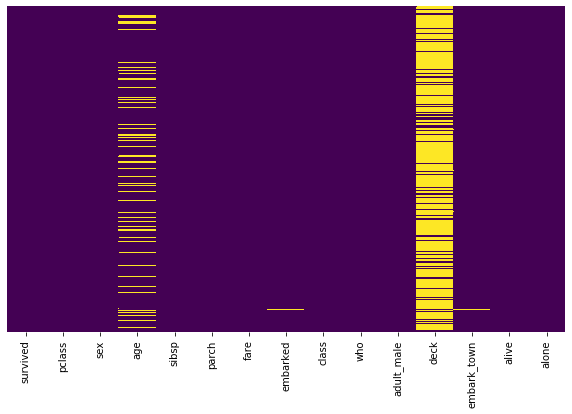

In [154]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**LOOKS LIKE THERE ARE NULL VALUES IN THE 'AGE','EMBARKED','DECK' AND EMBARK_TOWN COLUMNS**

**DROPPING THE REDUNDANT COLUMNS AND THOSE COLUMNS WITH VERY HIGH NUMBER OF NULL VALUES, NOT SUITABLE FOR ANALYSIS**

In [155]:
titanic.drop(['deck','embark_town','alive','class','adult_male','alone'],inplace=True,axis=1)

In [ ]:
**CHECKING THE AVERAGE AGE OF EACH PASSENGER CLASS**

In [156]:
titanic.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

**THE BETTER CLASS HAS HIGHER AVERAGE AGE, FILLING IN THE NULL VALUES OF THE AGE WITH THE AVERAGE AGE OF THE PARTICULAR PASSENGER CLASS**

In [157]:
for i in range(891):
    if pd.isnull(train.iloc[i,3]):
        if titanic.iloc[i,1]==1:
            titanic.iloc[i,3]=38
        if titanic.iloc[i,1]==2:
            titanic.iloc[i,3]=30
        if titanic.iloc[i,1]==3:
            titanic.iloc[i,3]=25                    

**DROPPING NULL VALUES LEFT** 

In [158]:
titanic.dropna(inplace=True)

**CHECKING FOR NULL VALUES**

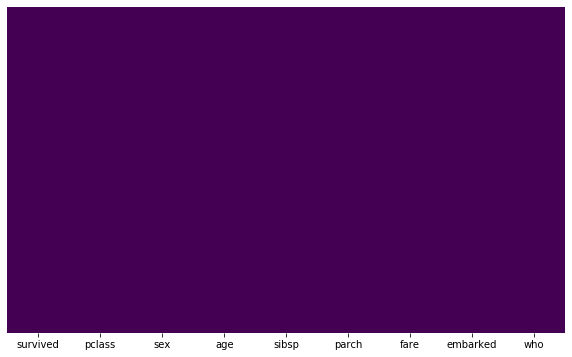

In [159]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**NO NULL VALUES LEFT**

In [160]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman
3,1,1,female,35.0,1,0,53.1000,S,woman
4,0,3,male,35.0,0,0,8.0500,S,man
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man
887,1,1,female,19.0,0,0,30.0000,S,woman
888,0,3,female,25.0,1,2,23.4500,S,woman
889,1,1,male,26.0,0,0,30.0000,C,man


**CONVERTING CATEGORICAL DATA TO NUMERICAL DATA FOR ANALYSIS BY MACHINE LEARNING ALGORITHMS**

In [161]:
Sex=pd.get_dummies(titanic['sex'],drop_first=True)
Embark=pd.get_dummies(titanic['embarked'])
Who=pd.get_dummies(titanic['who'])

**REMOVING THE TEXTUAL, CATEGORICAL DATA AND REPLACING BY THEIR NUMERICAL VALUES** 

In [162]:
titanic.drop(['sex','embarked','who'],axis=1,inplace=True)

In [163]:
titanic=pd.concat([titanic,Sex,Embark,Who],axis=1)

In [164]:
titanic

,survived,pclass,age,sibsp,parch,fare,male,C,Q,S,child,man,woman
0,0,3,22.0,1,0,7.2500,1,0,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,1,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,0,1,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0,0,1,0


In [165]:
titanic.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'C', 'Q',
       'S', 'child', 'man', 'woman'],
      dtype='object')

**APPLYING THE LOGISTIC REGRESSION MODEL TO THE CLEANED DATA**

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lg=LogisticRegression()

In [169]:
X=titanic.drop('survived',axis=1)
y=titanic['survived']

In [275]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [276]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
pr=lg.predict(X_test)

In [278]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,pr))

0.8014981273408239


**WE GOT A FAIRLY GOOD ACCURACY SCORE**

In [270]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       158
           1       0.78      0.69      0.73       109

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



**NOW WE WILL USE PRINCIPAL COMPONENT ANALYSIS ON THE SCALED DATA TO REDUCE THE DATA TO TWO PRICIPAL COMPONENTS FOR ANALYSIS BY LOGISTIC REGRESSION** 

In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(titanic.drop('survived',axis=1))
scaled_features=scaler.transform(titanic.drop('survived',axis=1))

In [176]:
scaled_features

array([[ 0.82520863, -0.5480701 ,  0.43135024, ..., -0.32090134,
         0.80962552, -0.65868882],
       [-1.57221121,  0.66675654,  0.43135024, ..., -0.32090134,
        -1.23513893,  1.51816755],
       [ 0.82520863, -0.24436344, -0.47519908, ..., -0.32090134,
        -1.23513893,  1.51816755],
       ...,
       [ 0.82520863, -0.3202901 ,  0.43135024, ..., -0.32090134,
        -1.23513893,  1.51816755],
       [-1.57221121, -0.24436344, -0.47519908, ..., -0.32090134,
         0.80962552, -0.65868882],
       [ 0.82520863,  0.21119655, -0.47519908, ..., -0.32090134,
         0.80962552, -0.65868882]])

In [177]:
df=pd.DataFrame(scaled_features,columns=['pclass','age','sibsp','parch','fare','male','C','Q','S','child','man','woman'])

In [178]:
df

,pclass,age,sibsp,parch,fare,male,C,Q,S,child,man,woman
0,0.825209,-0.548070,0.431350,-0.474326,-0.500240,0.735342,-0.482711,-0.307941,0.616794,-0.320901,0.809626,-0.658689
1,-1.572211,0.666757,0.431350,-0.474326,0.788947,-1.359911,2.071634,-0.307941,-1.621287,-0.320901,-1.235139,1.518168
2,0.825209,-0.244363,-0.475199,-0.474326,-0.486650,-1.359911,-0.482711,-0.307941,0.616794,-0.320901,-1.235139,1.518168
3,-1.572211,0.438977,0.431350,-0.474326,0.422861,-1.359911,-0.482711,-0.307941,0.616794,-0.320901,-1.235139,1.518168
4,0.825209,0.438977,-0.475199,-0.474326,-0.484133,0.735342,-0.482711,-0.307941,0.616794,-0.320901,0.809626,-0.658689
...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.373501,-0.168437,-0.475199,-0.474326,-0.384475,0.735342,-0.482711,-0.307941,0.616794,-0.320901,0.809626,-0.658689
885,-1.572211,-0.775850,-0.475199,-0.474326,-0.042213,-1.359911,-0.482711,-0.307941,0.616794,-0.320901,-1.235139,1.518168
886,0.825209,-0.320290,0.431350,2.006119,-0.174084,-1.359911,-0.482711,-0.307941,0.616794,-0.320901,-1.235139,1.518168
887,-1.572211,-0.244363,-0.475199,-0.474326,-0.042213,0.735342,2.071634,-0.307941,-1.621287,-0.320901,0.809626,-0.658689


In [291]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)

Text(0, 0.5, 'Second Principal Component')

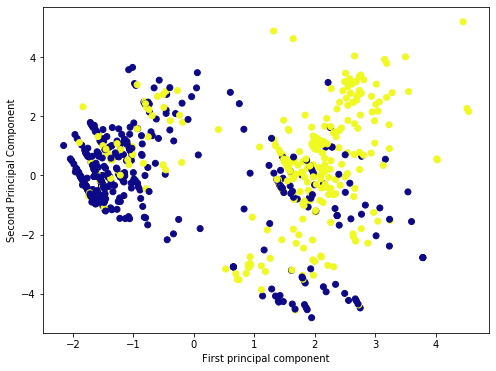

In [292]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=titanic['survived'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

**WE SEE THAT PCA HAS NOT CLASSIFIED THE DATA PROPERLY AND THERE IS LOT OF NOISE**

In [293]:
df_comp = pd.DataFrame(pca.components_,columns=['pclass','age','sibsp','parch','fare','male','C','Q','S','child','man','woman'])

In [294]:
pca.components_.shape

(2, 12)

In [295]:
x_pca.shape

(889, 2)

In [296]:
df_comp

,pclass,age,sibsp,parch,fare,male,C,Q,S,child,man,woman
0,-0.115840,-0.119561,0.197260,0.267349,0.215184,-0.505743,0.129851,0.047773,-0.143847,0.180758,-0.532042,0.451931
1,-0.410917,0.447453,-0.299733,-0.237047,0.263025,-0.050631,0.339774,-0.000049,-0.297674,-0.414641,0.083378,0.173843


In [297]:
df_compp = pd.DataFrame(x_pca,columns=[0,1])

In [298]:
df_compp

,0,1
0,-1.503882,-1.031532
1,2.690975,2.684420
2,1.415255,-0.306313
3,1.985808,0.952092
4,-1.797254,-0.313916
...,...,...
884,-1.564328,-0.066922
885,1.852152,0.557911
886,2.333561,-1.117779
887,-0.689118,2.015816


In [299]:
titanic['survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [300]:
df_compp.shape

(889, 2)

In [301]:
df_compp['survived']=titanic['survived'].values

In [302]:
df_compp['survived']

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: survived, Length: 889, dtype: int64

In [303]:
sum(df_compp['survived'].isnull())

0

**APPLYING LOGISTIC REGRESSION ON THE 2 PRINCIPAL COMPONENTS TO WHICH WE REDUCED THE TITANIC DATA**

In [304]:
X=df_compp.drop('survived',axis=1)
y=df_compp['survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [305]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [306]:
predictions=lg.predict(X_test)

**THE ACCURACY HAS NOT IMPROVED MUCH DUE TO POOR CLASSIFICATION**

In [307]:
print(accuracy_score(y_test,predictions))

0.8052434456928839


In [308]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84       161
           1       0.79      0.70      0.74       106

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [309]:
pca.explained_variance_ratio_*100

array([26.34748607, 19.23755572])

**THIS TELLS US WHY PCA COULDN'T CLASSIFY THE DATA WELL ALONG TWO COMPONENTS BECUASE MUCH OF THE VARIATION OF THE DATA LIES ALONG OTHER PRINCIPAL COMPONENTS LIKE PC3,PC4 AS WELL**